<a href="https://colab.research.google.com/github/elita234/Final_Project/blob/main/Keras_U_net_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/elita234/Final_Project.git

Cloning into 'Final_Project'...
remote: Enumerating objects: 1583, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 1583 (delta 3), reused 173 (delta 1), pack-reused 1406
Receiving objects: 100% (1583/1583), 847.83 MiB | 22.92 MiB/s, done.
Resolving deltas: 100% (669/669), done.
Checking out files: 100% (1400/1400), done.


In [2]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed = 42
np.random.seed = seed

IMG_WIDTH = 304
IMG_HEIGHT = 304
IMG_CHANNELS = 11

In [3]:
#TRAIN_PATH_s2 = '/content/drive/MyDrive/Studies/Final Project/data/train/s2/'
#TRAIN_PATH_esm = '/content/drive/MyDrive/Studies/Final Project/data/train/esm/'
#TEST_PATH_s2 = '/content/drive/MyDrive/Studies/Final Project/data/test/s2/'
#TEST_PATH_esm = '/content/drive/MyDrive/Studies/Final Project/data/test/esm/'
TRAIN_PATH_s2 = '/content/Final_Project/data/train/s2/'
TRAIN_PATH_esm = '/content/Final_Project/data/train/esm/'
TEST_PATH_s2 = '/content/Final_Project/data/test/s2/'
TEST_PATH_esm = '/content/Final_Project/data/test/esm/'

train_ids = next(os.walk(TRAIN_PATH_s2))[2]
test_ids = next(os.walk(TEST_PATH_s2))[2]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [4]:
from skimage.util import dtype
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH_s2 + id_
    #print(path)
    img = imread(path)[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    path = TRAIN_PATH_esm + 'ESM_'+id_[4:][:-4] + '.tif' # add the changes here to have the same names esm_XXX.tif
    #print(path)
    #for mask_file in next(os.walk(path))[2]:
    mask_ = imread(path)

    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',preserve_range=True), axis=-1)
    #mask_ = np.expand_dims(mask_, axis=-1)

    mask = np.maximum(mask, mask_)  
    
    new_mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    new_mask[np.where(mask[:,:,0] > 55)] = 1

    Y_train[n] = new_mask  
    #break 
    

# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)
Y_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH_s2 + id_
    img = imread(path)[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img
    #imshow(np.squeeze(X_test[n][:,:,0]))
    path = TEST_PATH_esm + 'ESM_'+id_[4:][:-4] + '.tif' # add the changes here to have the same names esm_XXX.tif

    mask_ = imread(path)
    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
    #mask_ = np.expand_dims(mask_, axis=-1)

    mask = np.maximum(mask, mask_)  

    new_mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    new_mask[np.where(mask[:,:,0] > 55)] = 1
   
    Y_test[n] = new_mask  
    #imshow(np.squeeze(Y_test[n],2))
    #break

print('Done!')

Resizing training images and masks


  0%|          | 0/600 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
100%|██████████| 600/600 [00:36<00:00, 16.53it/s]
/usr/local/lib/

Resizing test images


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
100%|██████████| 100/100 [00:06<00:00, 15.67it/s]

Done!


337


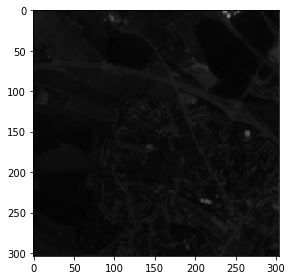

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


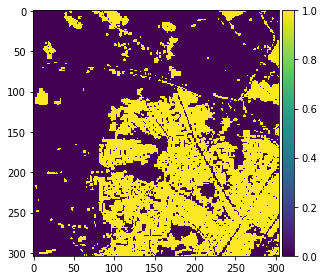

In [5]:

image_x = 337 #random.randint(0, len(train_ids))
print(image_x)
imshow(X_train[image_x][:,:,0])
plt.show()
image = np.squeeze(Y_train[image_x].astype(int),2) 
imshow(image)
plt.show()



In [6]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
#s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)
a = 4
#Contraction path
c1 = tf.keras.layers.Conv2D(16*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128*a, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64*a, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32*a, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16*a, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16*a, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 304, 304, 1  0           []                               
                                1)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 304, 304, 64  6400        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 304, 304, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
#Modelcheckpoint
val_ratio = 0.2

checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_seg3.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=val_ratio, batch_size=16, epochs=5, callbacks=callbacks)

Epoch 1/5
30/30 [==============================] - ETA: 0s - loss: 1.5780 - accuracy: 0.6383

In [ ]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*val_ratio)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*val_ratio):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


# training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix][:,:,0])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*val_ratio):][ix][:,:,0])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*val_ratio):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()


# random test samples
ix = random.randint(0, len(preds_test_t))
imshow(X_test[ix][:,:,0])
plt.show()
#imshow(np.squeeze(Y_test[ix],2))
#plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.show()






In [ ]:
cce = tf.keras.losses.CategoricalCrossentropy()